In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
import pandas as pd
#import aliensims as dy
import os
from astropy.io import ascii, fits
#from transit import occultnonlin, occultquad
#import ellc

In [4]:
rv_entry=ascii.read('../../Catalogs/robovetter_label.dat')
rv_pl=np.array(rv_entry['tce_plnt_num'])
rv_label = np.array(rv_entry['label'])
rv_kepid=[('0000'+str(el)[:9])[-9:] for el in rv_entry['kepid']]
u1=np.array(rv_entry['u1'])
u2=np.array(rv_entry['u2'])
b=np.array(rv_entry['b'])
rpl=np.array(rv_entry['rpl_rstar'])
rorb=np.array(rv_entry['rorb_rstar'])

In [12]:
hdu = fits.open('E:\\Masters_Project_Data\\TESS\\tess2021233042500-s0042-s0043-0000000090768237-00523_dvt.fits')
print(len(hdu))
print(hdu[1].header)

3
XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   44 / length of first array dimension                NAXIS2  =                36867 / length of second array dimension               PCOUNT  =                    0 / group parameter count (not used)               GCOUNT  =                    1 / group count (not used)                         TFIELDS =                   10 / number of table fields                         TTYPE1  = 'TIME    '           / column title: data time stamps                 TFORM1  = 'D       '           / column format: 64-bit floating point           TUNIT1  = 'BJD - 2457000, days' / column units: Barycenter corrected TESS JulianTDISP1  = 'D14.7   '           / column display format                          TTYPE2  = 'TIMECORR'           / colum

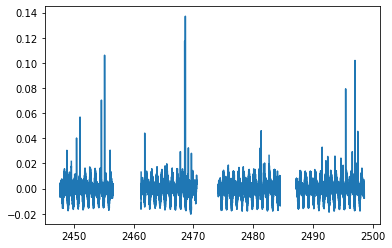

In [13]:
plt.plot(hdu[1].data['TIME'],hdu[1].data['LC_DETREND'])

In [10]:
path='C:\\Users\\Hp\Desktop\\temp_finallist\\manda\\'
path='C:\\Users\\Hp\Documents\\FYProj\processed_directories\go_circles\\new_final_fits\\'
entry = os.listdir(path)

for el in entry:
    kid=np.where(np.array(rv_kepid)==str(el[-15:-6]))[0]
    if(len(kid)==0): 
        #print("not in catalog",el[-15:-6])
        continue
    kidf=[x for x in kid if(str(rv_pl[x])==str(el[-5:-4]))]
    if(len(kidf)==0): 
        #print("not in catalog",el[-5:-4])
        continue
    if(rv_label[kidf[0]]=='CAN'):  
        print(kidf,rv_label[kidf[0]],el) 

[8840] CAN rank122_009944201_1.jpg
[721] CAN rank131_008616873_1.jpg
[393] CAN rank237_001161345_1.jpg
[216] CAN rank272_007380537_1.jpg
[956] CAN rank306_006620003_1.jpg
[7855] CAN rank368_006842345_1.jpg
[582] CAN rank377_010295951_1.jpg
[7596] CAN rank384_011404644_1.jpg
[3044] CAN rank386_010395543_1.jpg
[5676] CAN rank402_009574614_1.jpg
[1531] CAN rank434_010158418_1.jpg
[92] CAN rank446_003453214_1.jpg
[3534] CAN rank488_006309763_1.jpg
[37] CAN rank496_011138155_1.jpg
[1204] CAN rank500_012120943_1.jpg
[269] CAN rank508_009140402_1.jpg
[2757] CAN rank517_008684730_1.jpg
[3015] CAN rank518_009119458_1.jpg
[1646] CAN rank540_006300348_1.jpg
[2739] CAN rank552_007051180_1.jpg
[3602] CAN rank582_002569995_1.jpg
[172] CAN rank585_006526710_1.jpg
[5387] CAN rank586_008323764_1.jpg


In [2]:
print(ellc.lc.__doc__)


  Calculate the light curve of a binary star

  This function calculates the light curve of a binary star using the ellc
  binary star model [1].

  Parameters
  ----------
  t_obs : array_like
      Times or phases of observation. The units and time system used must be
      consistent with t_zero and period.

  radius_1 : float
      Radius of star 1 in units of the semi-major axis of the binary.
      The radius is defined to be the same as a sphere with the same volume as
      the ellipsoid used to approximate the shape of the star.
      Set radius_1=1 to fix radius at limiting radius in the Roche potential.

  radius_2 : float
      Radius of star 2 in units of the semi-major axis of the binary.
      The radius is defined to be the same as a sphere with the same volume as
      the ellipsoid used to approximate the shape of the star.
      Set radius_2=1 to fix radius at limiting radius in the Roche potential.

  sbratio : float
      Surface brightness ratio, S_2/S_1 

  incl

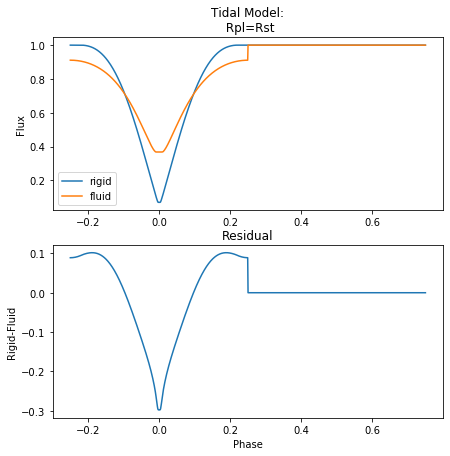

In [98]:
t = np.arange(-0.25,0.75, 0.001)
spots_1 = [[30,180],[45,-45],[25,35],[0.2,0.8]]
flux = ellc.lc(t,radius_1=0.5,radius_2=0.48,sbratio=0,incl=90,ld_1='quad',ldc_1=[0.2,0.02],
shape_1='sphere', shape_2='sphere' )

flux2 = ellc.lc(t,radius_1=0.5,radius_2=0.48,sbratio=0,incl=90,ld_1='quad',ldc_1=[0.2,0.02],
shape_1='sphere', shape_2='love', hf_2=5 )

# flux2 = ellc.lc(t,radius_1=0.3,radius_2=0.003,sbratio=0.1,incl=90,ld_1='quad',ldc_1=[0.9,0.9],
# shape_1='sphere', shape_2='love', hf_1=4.5, hf_2=4.5, q=0.6)
fig, ax = plt.subplots(2,1,figsize=(7,7))
ax[0].set_title('Tidal Model:\n Rpl=Rst')
ax[1].set_title('Residual')
ax[1].set_xlabel('Phase')
ax[1].set_ylabel('Rigid-Fluid')
ax[0].set_ylabel('Flux')
ax[0].plot(t,flux,label='rigid')
ax[0].plot(t,flux2, label='fluid')
ax[0].legend()
ax[1].plot(t,flux-flux2)

#plt.xlim(-0.052,0.052)
plt.savefig('tides2.png')
plt.show()

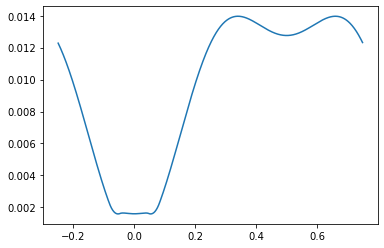

In [80]:
plt.plot(t,flux-flux2)


In [7]:
def gausses(x, A1, m1, s1, A2, m2, s2):
    y = A1*np.exp(-(x-m1)**2/(2*s1**2)) + A2*np.exp(-(x-m2)**2/(2*s2**2))
    return(y)

def lorz(x,A1,x0,g, A2, x02, g2):
    y = A1 / (1*((x-x0)**2+(g/2)**2)) + A2 / (1*((x-x02)**2+(g2/2)**2))
    return(y)

def new_plar(ph,p,minus, plus,rorb):
    u1 = (plus + minus)/2
    u2 = (plus - minus)/2
    znp = np.abs(rorb*np.sin(ph*np.pi))
    a= occultquad(znp,p,[u1,u2])  
    return(a -1) 

def new_plar_free(ph,p,u1,plus,rorb):
    u2 = plus - u1
    znp = np.abs(rorb*np.sin(ph*np.pi))
    a= occultquad(znp,p,[u1,u2])  
    return(a -1) 

def new_plar_free2(ph,p,u1,u2,rorb):
    znp = np.abs(rorb*np.sin(ph*np.pi))
    a= occultquad(znp,p,[u1,u2,])  
    return(a -1) 

c:\Users\Hp\Documents\FYProj\alienworlds\Sims\transit.py:829: RuntimeWarning: invalid value encountered in sqrt
  k = 0.5 * np.sqrt((1. - a) / (z * p))  # 8%
c:\Users\Hp\Documents\FYProj\alienworlds\Sims\transit.py:829: RuntimeWarning: invalid value encountered in sqrt
  k = 0.5 * np.sqrt((1. - a) / (z * p))  # 8%


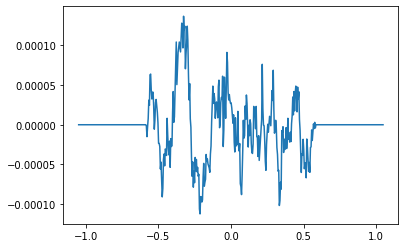

In [18]:
df = np.loadtxt('2d3d_0.1R_circ.csv')
frm = df[:,0]
d2 = df[:,1]
d3 = df[:,2]
#plt.plot(frm, d3-1)
plt.plot(frm, d3-1-new_plar_free2(frm/np.pi, 0.1, 0.0, 0.0, 2))
outdf = pd.DataFrame(zip(frm, d3-1, new_plar_free2(frm/np.pi, 0.1, 0.0, 0.0, 2)), columns=["frame","sim","model"])
outdf.to_csv('0.1R_circ_com.csv', sep=",", index=False)

here multiann_1.gif


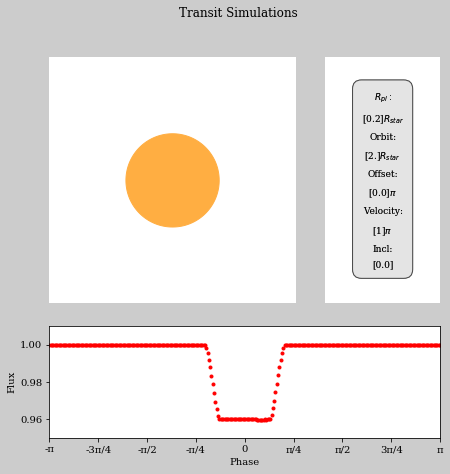

In [5]:
sim = dy.Simulator(100, 10000, 300, np.pi, 0,0)

#meg1 = dy.Megastructure(200, True, 20, ecc=0, o_vel=3, ph_offset=np.pi/3)
meg1 = dy.Megastructure(200, True, 20, ecc=0, o_vel=1, ph_offset=0)
# meg2 = dy.Megastructure(250, True, 10, ecc=0, o_vel=2,ph_offset=np.pi/2)
#meg3 = dy.Megastructure(350, True, 25, ecc=0.5, o_vel=1, per_off=np.pi/2)
sim.add_megs(meg1)
# sim.add_megs(meg2)
#sim.add_megs(meg3)

netlc=[]

for i in range(50):
    sim.initialize()
    sim.simulate_transit()
    netlc.append(sim.lc)
    
lc = np.mean(np.array(netlc), axis=0)
TA = dy.Transit_Animate(sim.road, sim.megs, lc, sim.frames)
TA.go(True,'multiann_1.gif')


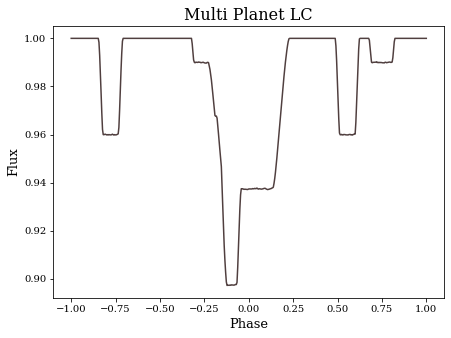

In [9]:
fig, ax = plt.subplots(1,1, figsize=(7,5))
ax.set_title('Multi Planet LC', size=16)
ax.plot(sim.frames/np.pi,lc, color="#503f3f")
ax.set_xlabel('Phase', size=13)
ax.set_ylabel('Flux', size=13)
plt.savefig('fprez_multipl.png')


In [7]:
##simple planet
sim = dy.Simulator(100, 10000, 300, np.pi, limb_u1=0.0, limb_u2=0)

#meg1 = dy.Megastructure(200, True, 20, isrot=True, incl=0, ecc=0.0, per_off=0)
meg1 = dy.Megastructure(200, False, 20, isrot=True, incl=0, ecc=0.0, per_off=0)
meg1.regular_polygons_2d(30,6)
meg2 = dy.Megastructure(200, False, 20, isrot=True, incl=0, ecc=0.0, per_off=0, elevation=0.3)
meg2.regular_polygons_2d(30,6)
sim.add_megs(meg1)
sim.add_megs(meg2)

netlc=[]

for i in range(50):
    sim.initialize()
    sim.simulate_transit()
    netlc.append(sim.lc)
    
lc = np.mean(np.array(netlc), axis=0)
TA = dy.Transit_Animate(sim.road, sim.megs, lc, sim.frames)
TA.go(True,'singleann2d_hex.gif')


In [286]:
th = np.linspace(0,2*np.pi, 300)
R = 1

In [6]:
store = pd.HDFStore('../../processed_directories/go_circles/analyse_circles/008110757_1')
data = store['data']
metadata = store.get_storer('data').attrs.metadata

print(metadata)
print(data)  

{'label': 'CANDIDATE', 'gauss': array([ 1.06993686, -0.27327537,  0.15474328,  2.29049703,  0.27944105,
        0.09994901]), 'lorz': array([ 2.90264487, -0.36730402,  0.09650209,  2.90264487,  0.2977978 ,
        0.06247015]), 'gdur': 0.5527164260076263, 'ldur': 0.6651018182938191, 'g_cov': array([ 2.10639781e-02, -5.93786869e-05, -2.13639982e-03, -5.22799007e-04,
       -1.07154441e-04,  1.35583989e-04, -5.93786869e-05,  5.93149639e-04,
        2.66565737e-05,  1.83048272e-04,  1.89318796e-05, -2.92279018e-05,
       -2.13639982e-03,  2.66565737e-05,  6.32526264e-04,  2.57338304e-04,
        3.96855913e-05, -5.40036832e-05, -5.22799007e-04,  1.83048272e-04,
        2.57338304e-04,  3.21965749e-02,  2.24580290e-05, -9.61887270e-04,
       -1.07154441e-04,  1.89318796e-05,  3.96855913e-05,  2.24580290e-05,
        8.45497148e-05, -4.43016522e-06,  1.35583989e-04, -2.92279018e-05,
       -5.40036832e-05, -9.61887270e-04, -4.43016522e-06,  8.73278967e-05]), 'l_cov': array([ 4.40247812e+0

In [287]:
def Prob(x, z, u):
    k=1-u/2
    y = ((1-u)*x + u*x**2/2)/k -z
    return(y)

def Prob2(x, z, u):
    k=(1-u)*R+u*np.pi*R/4
    y = ((1-u)*x + u*x*np.sqrt(R**2-x**2)/2*R + u*R*np.arcsin(x/R)/2)/k -z
    return(y)

1.0 0.8414709848078965 32767


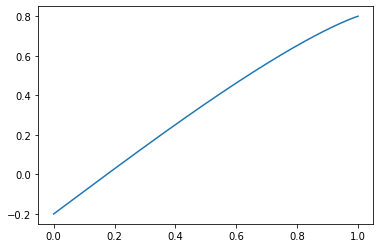

In [288]:
sol = root_scalar(Prob2,args=(1,0.1),bracket=[0,R])
plt.plot(np.linspace(0,1,200), Prob2(np.linspace(0,1,200), 0.2, 0.6))
print(sol.root, np.sin(sol.root),sol.iterations)

In [311]:
ran_th=2*np.pi*np.random.rand(20000)
temp_z =np.sqrt(np.random.rand(20000))
#temp_z =0.9*np.ones(200)
ths = []
for el in temp_z:
    sol = root_scalar(Prob2,args=(el,0.0),bracket=[0,R])
    #print(el,sol.root)
    ths.append(sol.root)

ran_x = 10*np.asarray(ths)

#print(ran_rad, len(ran_rad))

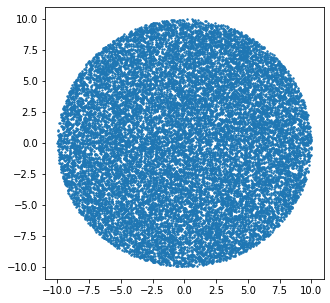

In [312]:
plt.figure(figsize=(5,5))
#plt.plot(R*np.cos(th), R*np.sin(th))
plt.scatter(ran_x*np.sin(ran_th), ran_x*np.cos(ran_th), s=2)
#plt.scatter(ran_rad*np.cos(ran_th)*ran_x, ran_rad*np.sin(ran_th)*ran_x, s=2)